In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

D:\.anaconda\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\.anaconda\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
datafile = "data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(datafile)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['stroke'] = df['stroke'].astype('category').cat.codes
df = df.dropna()
df = pd.get_dummies(df, columns=['smoking_status', "work_type", "Residence_type", "ever_married"])
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']


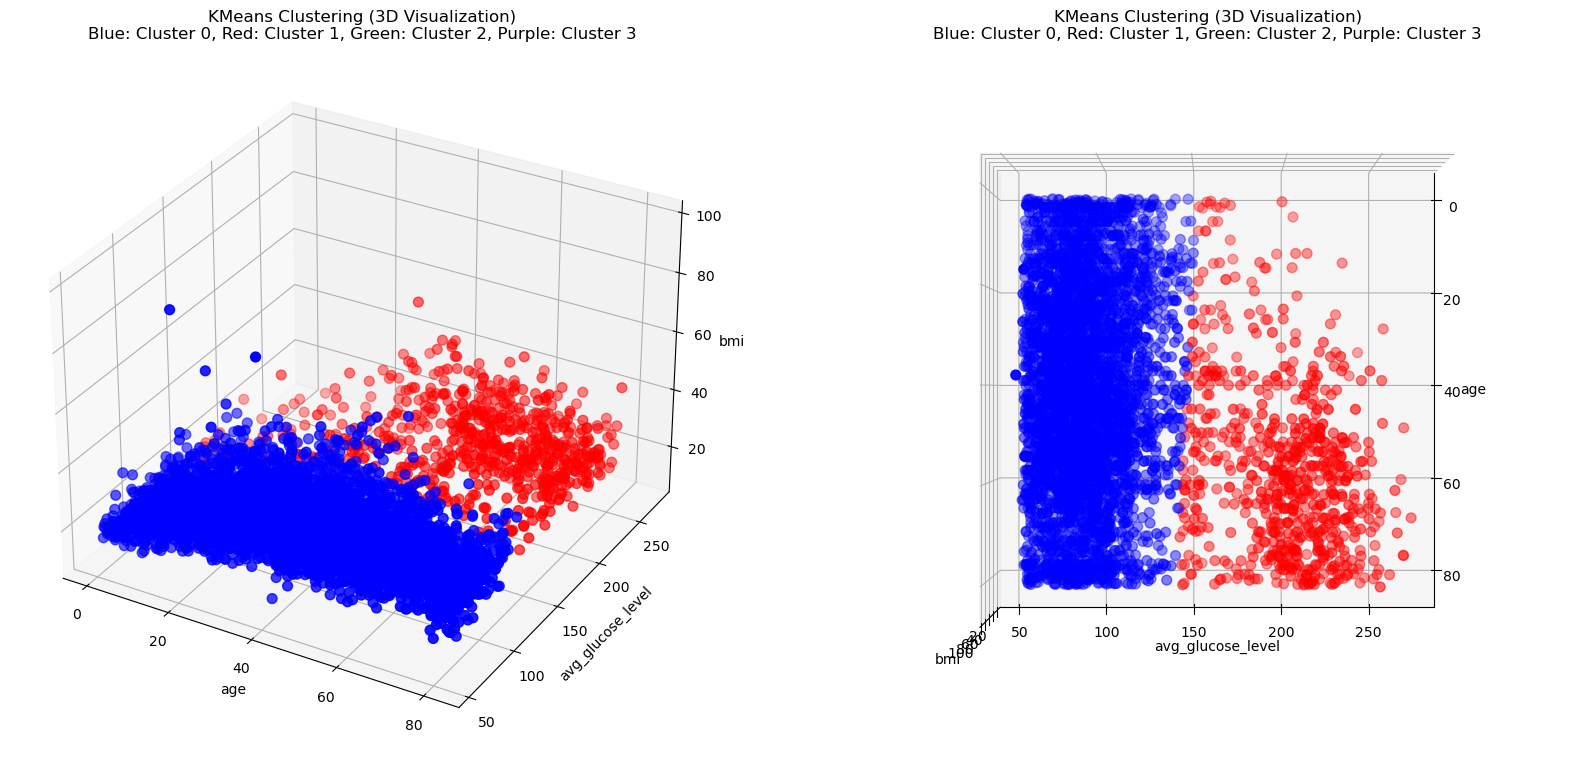

In [4]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

x_feature = 'age'
y_feature = 'avg_glucose_level'
z_feature = 'bmi'

colors = {0: 'blue', 1: 'red'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12), subplot_kw={'projection': '3d'})

ax1.scatter(df[x_feature], df[y_feature], df[z_feature], c=df['cluster'].map(colors), s=50)
ax1.set_xlabel(x_feature)
ax1.set_ylabel(y_feature)
ax1.set_zlabel(z_feature)
ax1.set_title('KMeans Clustering (3D Visualization)\nBlue: Cluster 0, Red: Cluster 1, Green: Cluster 2, Purple: Cluster 3')

ax2.scatter(df[x_feature], df[y_feature], df[z_feature], c=df['cluster'].map(colors), s=50)
ax2.set_xlabel(x_feature)
ax2.set_ylabel(y_feature)
ax2.set_zlabel(z_feature)
ax2.set_title('KMeans Clustering (3D Visualization)\nBlue: Cluster 0, Red: Cluster 1, Green: Cluster 2, Purple: Cluster 3')
ax2.view_init(elev=90, azim=0)

plt.show()

In [5]:
cluster_means = df.groupby('cluster')['stroke'].mean().sort_values(ascending=False)

high_risk_clusters = cluster_means.index.tolist()

print("Clusters ordered by stroke mean (high to low):", high_risk_clusters)


Clusters ordered by stroke mean (high to low): [1, 0]


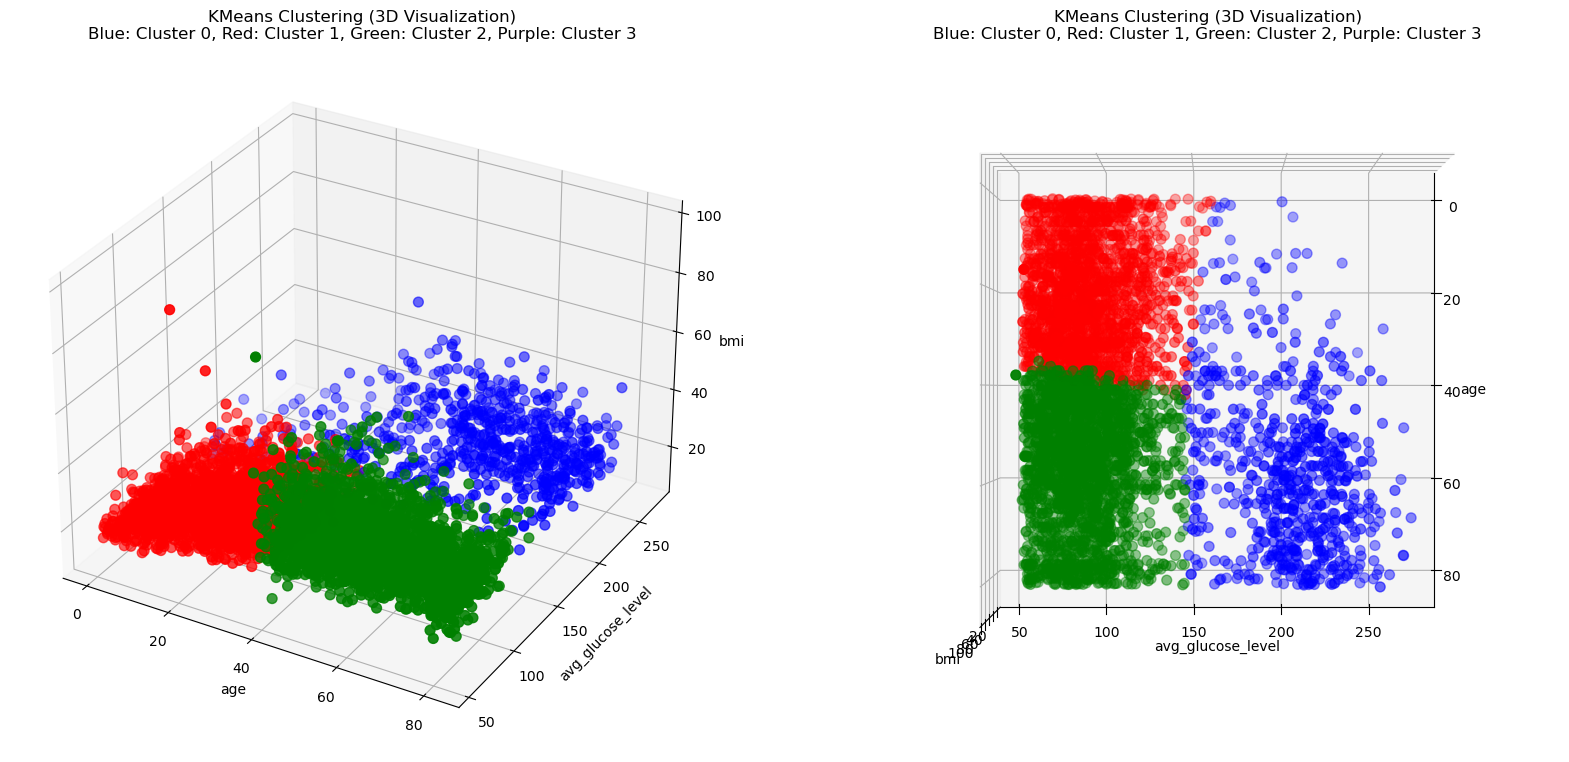

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

colors = {0: 'blue', 1: 'red', 2: 'green'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12), subplot_kw={'projection': '3d'})

ax1.scatter(df[x_feature], df[y_feature], df[z_feature], c=df['cluster'].map(colors), s=50)
ax1.set_xlabel(x_feature)
ax1.set_ylabel(y_feature)
ax1.set_zlabel(z_feature)
ax1.set_title('KMeans Clustering (3D Visualization)\nBlue: Cluster 0, Red: Cluster 1, Green: Cluster 2, Purple: Cluster 3')

ax2.scatter(df[x_feature], df[y_feature], df[z_feature], c=df['cluster'].map(colors), s=50)
ax2.set_xlabel(x_feature)
ax2.set_ylabel(y_feature)
ax2.set_zlabel(z_feature)
ax2.set_title('KMeans Clustering (3D Visualization)\nBlue: Cluster 0, Red: Cluster 1, Green: Cluster 2, Purple: Cluster 3')
ax2.view_init(elev=90, azim=0)

plt.show()